In [236]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from scipy import integrate
from numpy.random import uniform as unif
from numpy.random import random as rng
from tqdm import tqdm

**Metodo de montecarlo**

Para calcular la integral definida

$$ \int_{a}^{b} f(x) dx = \frac{b-a}{M} \sum_{n=1}^{M} f(x_n) $$

Don de M es la cantidad de números aleatorios.

Montecarlo se usa mas en la generacion de numeros aleatorios bajo condiciones.

In [231]:
#Cantidad de aleatorios
cant_num = 10000

#aleatorios especificos para el intervalo
lim_inf = 0.8
lim_sup = 3
x = unif(lim_inf,lim_sup,cant_num)

suma = 0

def aleatory_function(x):
    return 1 / (1 + (np.sinh(2*x)*(np.log(x)**2)))

for i in range(cant_num):
    suma = suma + aleatory_function(x[i])
    
promedio = suma/cant_num
resultado = (lim_sup-lim_inf)*promedio
    
print(resultado)

0.6753220176358462


**Generación de números aleatorios mediante el método de aceptacion**

In [234]:
cant_num = 5000

x=2*rng(cant_num)-1
y=2*rng(cant_num)-1

def Funcion(x):
    return 0.5516*np.exp(-x**4)



num_list = []

for i in range(cant_num):
    if Funcion(x[i])<=y[i]:
        num_list.append(x[i])
        
print(num_list)

[0.2094076480084921, 0.22302546310323623, -0.9461594031234213, 0.6882044306822528, 0.415385323751277, 0.8405412334166105, 0.9954419755140187, -0.07307071413873656, 0.5769251363807855, -0.8923316107842107, -0.9900878202064367, 0.06040047652207492, -0.9521319919092064, 0.6680426653829308, 0.011292450000855325, -0.111320762550976, 0.9847852417634675, -0.36984125003654245, -0.9785886248506839, 0.2600401762313178, 0.9173528537988282, 0.7040021369745244, 0.25305706234444125, -0.6307854018244219, 0.28426620182798734, 0.9096319279258613, -0.9044626206387041, 0.2760585204909005, -0.3674876652244954, 0.5088301762229614, -0.04272205962404896, 0.011709809216975398, 0.6044869335261409, -0.6431395111761187, -0.4235821414939265, 0.043650326040204135, -0.25884043185885464, 0.9318609251114627, 0.13374983508109328, -0.2548941373349749, -0.4876754678876518, -0.18822666102074304, -0.3225935000651303, 0.9712991531949058, 0.1574892366329268, 0.49528956176401073, -0.13668940157636444, -0.6301997999718036, 0.

**Metodo del trapecio**

Para calcular la integral definida

$$ \int_{a}^{b} f(x) dx = \frac{h}{2} (f(x_0) + f(x_n)) + h \cdot \sum_{j=1}^{n-1} f(x_j) $$


**5)** Resolver la siguiente integral con el método del trapecio:

In [4]:
x_init = 0
x_fin = 1
nodos = 11
original = 0.74682413281242
# error en el metodo estara dado con la segunda derivada

def f(x):
    return np.exp(-x**2)

def trap_integrate(f, x_init, x_fin, nodos):
    
    error = 0
    if error < 0.005:
        x,h = np.linspace(x_init, x_fin, num=nodos-1, retstep = True)
        
        integral = 0.5*h*(f(x[0]) + f(x[-1])) + h*np.sum(f(x[1:-1]))
        error = original - integral
        
    return integral


trap_integrate(f, x_init, x_fin, nodos)

0.7460668679126695

**Metodo de Simpson compuesta**

La hpta expresion de abajo que esta una mrda, solo recordar que se exige que n sea par

**6)** Para encontrar la inductancia exacta de una bobina toroidal es necesario calcular la
integral:

In [5]:
a_init = -0.01
a_fin = 0.01
nodos = 11
R =0.5
original = np.pi*(R-np.sqrt(R**2 - 0.01**2))

def F(x):
    return (np.sqrt(0.01**2 - x**2))/(0.5 + x)

#metodo del trapecio

def trap_integrate(f, x_init, x_fin, nodos):
    error = 0
    if error < 0.5:
        x,h = np.linspace(x_init, x_fin, num=nodos-1, retstep = True)
        integral = 0.5*h*(f(x[0]) + f(x[-1])) + h*np.sum(f(x[1:-1]))
        error = original - integral
        
    return integral

#regla de simpson 1/3

def simpson_integrate_f(f, x_ini, x_fin, nodos):
    error = 0
    if error < 0.5:
        x, h = np.linspace(x_ini, x_fin, num=nodos, retstep = True)
        integral = (h/3)*(f(x[0]) + 2*np.sum(f(x[2:-1:2])) + 4*np.sum(f(x[1:len(x):2])) + f(x[-1]))
        error = original - integral
    return integral


print(trap_integrate(F, a_init, a_fin, nodos))
print(simpson_integrate_f(F, a_init, a_fin, nodos))

0.0003019499925685445
0.00031004702233502313


**12)** Using the Simpson’s 3/8 rule, calculate the following integral:

Esta es solo la aproximacion
Que el error me la chupe porque esta horrible

In [6]:

a = -1
b = 1
def f2(x):
    return np.sqrt(1 + np.exp(-x**2))

def simpson_integrate_3_8(f, a, b):
    h = (b-a) / 3
    m1 = (2*a + b) / 3
    m2 = (a + 2*b) / 3
    return ((3*h)/8)*(f(a) + 3*f(m1) + 3*f(m2) + f(b))

simpson_integrate_3_8(f2, -1, 1)

2.649579329907684

**Cuadratura de Gauss-Legendre**

Para una integral definida entre -1 y 1, estará definida con la expresion

$$  \sum_{i=1}^{n} w_if(x_i)  $$

Donde w_i corresponde al peso de la cuadratura del polinomio y x_i a la raíz de este. Para un intervalo cualquiera

$$ \frac{b-a}{2} \sum_{i=1}^{m} w_if(\frac{b-a}{2}X + \frac{a+b}{2} )  $$

Donde X son las condiciones de la cuadratura.

In [7]:
x_ini = 0
x_fin = 10

X = np.array([-np.sqrt(1/3), np.sqrt(1/3)])
W = np.array([1, 1])

def gauss_legendre_integrate(f,X,W):
  return np.sum(W*f(X))

def gauss_legendre_integrate_ab(f,X,W,a,b):
  c1 = 0.5*(b-a)
  c2 = 0.5*(a+b)
  return c1*np.sum(W*f(c1*X + c2))

gauss_legendre_integrate_ab(f,X,W,x_ini,x_fin)

0.05747633613196697

**13)** Evaluar.

In [12]:
X1, W1 = np.polynomial.legendre.leggauss(2)
X2, W2 = np.polynomial.legendre.leggauss(3)

def f1(x):
    return 1 /(x**2)

print(gauss_legendre_integrate_ab(f1,X1,W1,1,2))
print(gauss_legendre_integrate_ab(f1,X2,W2,1,2))

0.4970414201183432
0.4998740236835476


**16)** Estime la siguiente integral usando el m´etodo de cuadratura de Gaus-Legendre:

In [72]:
X1, W1 = np.polynomial.legendre.leggauss(3)
X2, W2 = np.polynomial.legendre.leggauss(10)

def Fun(x):
    return 1 / ((x**4) + 1 )

I1 = gauss_legendre_integrate_ab(Fun,X1,W1,0,1)
I2 = gauss_legendre_integrate_ab(Fun,X2,W2,1,8)

Total = I2 + I1
print(Total)

1.1106046518921942


Para la obtencion de los pesos se puede usar numpy o el codigo del taller.

In [9]:
#numpy para legendre
X, W = np.polynomial.legendre.leggauss(2)
#numpy para laguerre: np.polynomial.legendre.leggauss

#taller punto de Laguerre

**Cuadratura Gauss-Laguerre**

Muy parecida a la de legendre solo que hay que tener en cuenta de ppner a la funcion de la forma e^{-x}.

$$ \int_{0}^{∞} f(x)e^{-x} = \sum_{i=1}^{n} w_if(x_i)$$

**Clase para integración de trapezoide y simpson.**

In [191]:
class Integrator:
    
    def __init__(self, x, f):
        
        self.x = x
        self.h = self.x[1] - self.x[0]
        
        self.y = f(self.x)
        
        self.Integral = 0.
        self.Error = 0.
        
        
    def GetStep(self):
        return self.h

In [192]:
class Trapezoid(Integrator):
    
    def __init__(self,x,f):
        Integrator.__init__(self,x,f)
        
    def GetIntegral(self):
        
        self.Integral = 0.
        
        self.Integral += 0.5*(self.y[0]+self.y[-1])
        
        self.Integral += np.sum( self.y[1:-1] )
        
        return self.Integral*self.h
    
    def GetDerivative(self):
        return ( f(self.x+self.h) - 2*f(self.x) + f(self.x-self.h) )/self.h**2
    
    def GetError(self):
        
        d = self.GetDerivative()
        
        max_ = np.max(np.abs(d))
        
        self.error = (max_*(self.x[-1]-self.x[0])**3)/(12*(len(self.x)-1)**2)
        
        return self.error

In [193]:
class Simpson(Integrator):
    
    def __init__(self,x,f):
        Integrator.__init__(self,x,f)
        
    def GetIntegral(self):
        
        self.Integral = 0.
        
        self.Integral += self.y[0]+self.y[-1]
        
        
        for i in range( len(self.y[1:-1]) ):
            if i%2 == 0:
                self.Integral += 4.*self.y[i+1]
            else:
                self.Integral += 2.*self.y[i+1]
        
        
        return self.Integral*self.h/3.
    
    def GetDerivative(self):
        
        d = f(self.x+2*self.h) - 4*f(self.x+self.h) + 6*f(self.x) - 4*f(self.x-self.h) + f(self.x-2*self.h)
        d = d/self.h**4
        return d
    
    def GetError(self):
            
        d = self.GetDerivative()
            
        max_ = np.max( np.abs(d) )
            
        self.error = ( (self.x[-1]-self.x[0])*self.h**4 * max_  ) /180
            
        return self.error

In [198]:
#Aquí defino la funcion
f = lambda x: np.sin(x)
#Nodos
N = 12
#Limites
x = np.linspace(0,0.5*np.pi,N+1)

In [199]:
Trapezoid(x,f).GetIntegral()

0.9985716979019743

In [200]:
Trapezoid(x,f).GetError()

0.002239730054873284

In [201]:
Simpson(x,f).GetIntegral()

1.0000016344385796

In [203]:
Simpson(x,f).GetError()

2.5548268139593947e-06

In [204]:
#con el modulo de spicy
integrate.trapezoid(f(x),x)

0.9985716979019744

In [205]:
integrate.simpson(f(x),x)

1.0000016344385798

**19) y 20)** Superconductividad.

In [143]:
#19 me da la temperatura critica
def ForbiddenBand(x, T, deltaT):
    Above = np.tanh(np.sqrt(x**2 + deltaT**2) * 300/(2*T))
    Below = np.sqrt(x**2 + deltaT**2)
    return 0.5 * (Above/Below)

x, wi = np.polynomial.legendre.leggauss(50)

T, dT = np.linspace(1, 20, 190000, retstep = True)

def LookingForTc(roots, weights, T, dT):
    for temperature in T:
        Integral = np.sum(weights*ForbiddenBand(roots, temperature, dT))
        if np.abs((Integral - 1./0.3)) < dT:
            return temperature

CriticTemperature = round(LookingForTc(x, wi, T, dT), 5)

print(CriticTemperature)

12.13356


In [142]:
#20
def ForbiddenBand(x, T, deltaT):
    Above = np.tanh(np.sqrt(x**2 + deltaT**2) * 300/(2*T))
    Below = np.sqrt(x**2 + deltaT**2)
    return 0.5 * (Above/Below)

x, wi = np.polynomial.legendre.leggauss(50)

t = np.linspace(0.01,20.,50)
delta = np.linspace(0.,1.10000)

def LookingForTc(roots, weights, T, dT):
    for temperature in T:
        Integral = np.sum(weights*ForbiddenBand(roots, temperature, dT))
        if np.abs((Integral - 1./0.3)) < 1e-3:
            Tc = temperature
            return Tc

Tc = LookingForTc(x, wi, t, delta)

print(Tc)


None


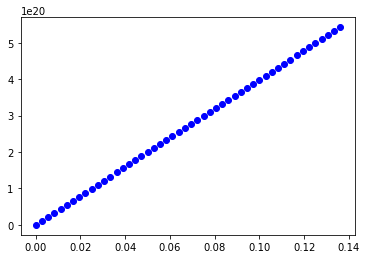

In [138]:
t = np.linspace(0.01,20.,50)
delta = np.linspace(0.,1.10000)

Tf = t/Tc
Delt = delta/Tc
k_b = 1.38e-23
x_values = Tf/Tc
y_values = Delt / (Tc*k_b)
plt.scatter(x_values,y_values, color='b')

**21)** Una funci´on se puede representar como una combinaci´on lineal de N + 1 polinomios de
Legendre Pn(x), n = 0, 1, ..., N.

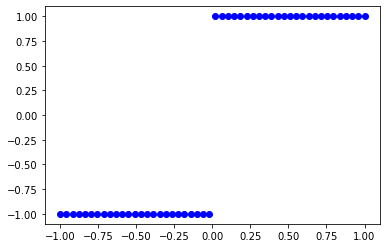

In [154]:
N = 20
def sgn(x):
    if x<0:
        respuesta = -1
        
    if x==0:
        respuesta = 0
        
    if x>0:
        respuesta = 1
        
    return respuesta

y_ = []
x_values = np.linspace(-1,1,50)
y_values = np.linspace(-1,1,50)

for i in x_values:
    y_.append(sgn(i))




In [175]:
#pesos y raices
x, wi = np.polynomial.legendre.leggauss(15)

#polinomios
x_ = sym.Symbol('x',real=True)

#Código que genera los polinomios de Legendre

#Primeros polinomios de Legendre
p0 = 1
p1 = x_
Legendre_polynomy = [p0,p1]

#Demás grados de polinomio
for i in range(2,N):
    Legendre_basis = ((2*i-1)*(x_*p1) - (i-1)*p0) / i
    Legendre_polynomy.append(Legendre_basis)
    p0 = p1
    p1 = Legendre_basis


a = Legendre_polynomy[0]*sgn(-1)

Int = sym.integrate(a,(x_,-1,1))
print(Int)

-2


In [181]:
fx = []
#x para iterar
x_v = np.linspace(-1,1,50)

for n in range(0,N):
    #primero integro con sympy y luego uso el lambdify
    #pol = sym.lambdify([x_], Legendre_polynomy[n], 'numpy')
    
    a = Legendre_polynomy[n]*sgn(x_v[n])
    mul = sgn(n)*Legendre_polynomy[n]
    Int = sym.integrate(a,(x_,-1,1))
    #Int = sym.integrate(mul,(x,-1,1))
    cn = (((2*n +1)/ 2) * Int)*Legendre_polynomy[n]
    fx.append(cn)
    


[-1.00000000000000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [253]:
#puntos parcial metodo de montecarlo

N =100000
def CreateSphere(N,R=1):
    
    Points = np.zeros((N,3))
        
    for i in tqdm(range(N)):
        
        phi = np.random.uniform(0,2*np.pi)
        u = np.random.rand()
        r = R*u**(1/3)
        costheta = np.random.uniform(-1,1)
        theta = np.arccos(costheta)
        
        Points[i] = [r*np.cos(phi)*np.sin(theta),r*np.sin(phi)*np.sin(theta),r*np.cos(theta)]
        
    return Points

In [254]:
Sphere = CreateSphere(N)

100%|██████████| 100000/100000 [00:01<00:00, 71157.24it/s]


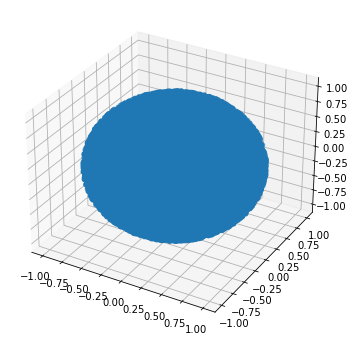

In [255]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(Sphere[:,0],Sphere[:,1],Sphere[:,2])

In [248]:
Sphere

array([[-0.09744818, -0.35024271,  0.03752875],
       [-0.61718553,  0.36933182, -0.02146506],
       [-0.31297319,  0.5685671 , -0.64313767],
       ...,
       [-0.52765667, -0.27800006,  0.01466527],
       [-0.22306789,  0.06398932,  0.64595822],
       [-0.35959965,  0.47225379,  0.27258863]])

In [262]:

def Ixx(y,z):
    return y**2 + z**2

def Iyy(x,z):
    return x**2 + z**2

def Izz(x,y):
    return x**2 + y**2

def Ixy(x,y):
    return x*y

def GetMomentum(a):
    suma = 0
    if a=='x':
        for i in range(N):
            suma = suma + Ixx(Sphere[i][1],Sphere[i][2])
            
    if a=='y':
        for i in range(N):
            suma = suma + Iyy(Sphere[i][0],Sphere[i][2])
            
    if a=='z':
        for i in range(N):
            suma = suma + Izz(Sphere[i][0],Sphere[i][1])
    
    if a=='xy':
        for i in range(N):
            suma = suma + Ixy(Sphere[i][0],Sphere[i][1])
        suma = -suma
    
    promedio = suma/N
    
    return promedio

GetMomentum('xy')

0.000541614762727305

In [264]:
print("El valor esperado de la integral es: {}, el momento de inercia para x: {}, el momento de inercia para y: {}, el momento de inercia para z: {}".format((2/5),GetMomentum('x'),GetMomentum('y'),GetMomentum('z')))
print("El producto inercial es: {}".format(GetMomentum('xy')))

El valor esperado de la integral es: 0.4, el momento de inercia para x: 0.39971072958928533, el momento de inercia para y: 0.40017542672281076, el momento de inercia para z: 0.4002331122812148
El producto inercial es: 0.000541614762727305
